-----
## Práctico Análisis y Visualización

El siguiente trabajo esta pensado para ser entregado en formato de tipo informe en un notebook Python hecho en Jupyter Lab o Google Colab. Debera apuntar a un público técnico con conocimientos generales del tema. 

La presentación de los resultados debe ser clara, apoyar las conclusiones extraidas y ser lo mas sintetico posible. No necesariamente todo lo que prueben debe estar reflejado en el informe. Ciertamente valoramos el esfuerzo de explorar alternativas de análisis y visualización, pero parte del trabajo es elegir también las mas adecuadas. 

----

## Consignas

### 1. Armado del dataset

Inicialmente nuestro conjunto de datos se encuentra distribuido en varios archivos. Es necesario juntar todo en un mismo set de datos para facilitar la manipulacion. 

- Describir las caracteristicas generales de los datasets presentes en los archivos de entrada: Numero de registros, diferencias entre los mismos. 
- Definir conveniencia de usar todos los datos juntos en un mismo dataset o separarlos. 

### 2. Exploración

- De que consta nuestro dataset? que tipo de datos tenemos?
- Nuestra variable a predecir, esta balanceada dentro del dataset etiquetado?
- Que tipo de curacion creen que seria necesaria realizar? Existen datos nulos?
- En base a lo que podemos entender conceptualmente sobre nuestras variables, existe alguna que a priori pueda tener una mayor influencia sobre nuestro objetivo a predecir? por qué?
- Existe correlacion entre las variables del dataset? Cual metodo de cálculo de correlacion conviene usar para este tipo de variables?

### 3. Visualización

- Como se distribuyen las variables? Cuales siguen una distribucion normal y cuales no?
- Explorar las diferencias entre las distribuciones de las distintas variables: 
  - según el paciente
  - según la etiqueta a predecir
  - ambas (usar hue)
- Hay outliers presentes en nuestras distribuciones? habria que sacarlos?

### **Sobre los datos no etiquetados**

Si bien todavia no vamos a predecir una etiqueta, nos interesa entender lo mas posible sobre estos datos para poder entender las predicciones de los modelos.

- Visualizar las distribuciones de las distintas metricas. Se comportan parecido a los etiquetados si eliminaramos las etiquetas? y si las consideramos?

### 4. Conclusiones

Sobre los datos etiquetados: 
- En base al análisis, se pudo encontrar cual(es) son las métricas que mejor diferencian un estado de otro?

Sobre los no etiquetados:
- Conviene analizarlos junto con los que si estan etiquetados? 

### 5. Opcional: Analizar las señales originales y obtener un nuevo cuantificador.

- Para las señales de EEG de un paciente , acceder a cada uno de los datos de EEG

Para cada archivo: 

- Preprocesar las señales (aplicar filtro de pasa banda ) pertenecientes a los 16 canales 
- Analizar la entropía espectral de cada una de las señales y calcular el valor medio sobre todos los canales.
- Almacenar los datos en un Data Frame  

*la entropía espectral se calcula usando el paquete  [antropy](https://github.com/raphaelvallat/antropy) (se instala con $ pip instal antropy). 

El comando es antropy.spectral_entropy(señal, sf=400, method='welch', normalize=True))   (señal es la señal de EEG , los otros parametros quedan fijos)

----------------------------------------------------
### 1. Armado del dataset

Recordemos los significados de cada una de las métricas calculadas:

*  PE: Entropía de permutación 
*  SC: Complejidad Estadistica 
*  GNE: Entropia Globlal de Redes 
*  LZC: Complejidad de Lempel Ziv 
*  STE: Entropía Tsallis 
*  Mean: Valor medio 
*  Std: Desvio estandar  
*  Skew: Oblicuidad  
*  SE: Entropía espectral


In [1]:
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
ne_p1 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_noEtiquetado_P1.csv')
ne_p2 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_noEtiquetado_P2.csv')
ne_p3 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_noEtiquetado_P3.csv')
e_p1 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_test_P1.csv')
e_p2 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_test_P2.csv')
e_p3 = pd.read_csv('/home/floormolina99/DiploDatos/Mentoria/Data_test_P3.csv')

In [3]:
ne_p1.head()

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,0.569169,0.285503,0.615967,0.428966,0.269077,0.777645,-1.057214e-06,25.648324,-0.026364
1,1.0,0.540103,0.283395,0.568056,0.411565,0.190297,0.751926,-4.563585e-06,54.238732,-0.091269
2,1.0,0.489490,0.280860,0.488495,0.465578,0.207542,0.710696,3.029157e-06,23.845106,-0.035229
3,1.0,0.541447,0.283588,0.570310,0.412085,0.204437,0.753217,-1.653840e-06,52.400790,-0.084385
4,1.0,0.538152,0.283284,0.565175,0.433228,0.221188,0.750362,2.011270e-07,44.700336,-0.058764


In [4]:
e_p1.head()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,1.0,0.598255,0.285388,0.662095,0.520937,0.325380,0.802138,4.426225e-06,15.557899,-0.000629
1,1.0,0.0,0.541613,0.283209,0.570060,0.413078,0.195333,0.752879,2.075434e-05,48.467869,-0.031036
2,1.0,0.0,0.543293,0.283316,0.572859,0.418008,0.199974,0.754335,5.322688e-06,46.771531,-0.077559
3,1.0,0.0,0.535949,0.282724,0.560678,0.391206,0.166309,0.747854,-1.353617e-05,48.590217,-0.024175
4,1.0,0.0,0.436980,0.272283,0.398864,0.412815,0.116037,0.668147,-5.555946e-07,41.749673,-0.087401


In [5]:
ne_p1.describe()

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,1583.0,1583.000000,1583.000000,1583.000000,1536.000000,1583.000000,1583.000000,1.583000e+03,1583.000000,1583.000000
mean,1.0,0.511078,0.269405,0.532806,0.450607,0.221358,0.715413,-2.261665e-07,35.158430,-0.075151
std,0.0,0.121973,0.052343,0.156034,0.048198,0.086233,0.153395,1.327197e-05,17.446517,0.180611
min,1.0,0.000000,0.000000,0.000000,0.373847,0.000149,0.000000,-8.649349e-05,0.000000,-4.505270
25%,1.0,0.519548,0.281980,0.534740,0.413939,0.182224,0.734813,-5.418128e-06,18.433018,-0.095238
50%,1.0,0.543030,0.283482,0.573283,0.435139,0.219643,0.754642,-8.332419e-09,36.896092,-0.063020
75%,1.0,0.576996,0.285173,0.628183,0.484272,0.292058,0.784019,4.410243e-06,48.811644,-0.032865
max,1.0,0.623450,0.286239,0.705125,0.581357,0.373753,0.825447,8.518837e-05,82.293169,2.770052


In [6]:
ne_p2.describe()

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,2255.0,2255.000000,2255.000000,2255.000000,2226.000000,2255.000000,2255.000000,2.255000e+03,2255.000000,2255.000000
mean,2.0,0.524269,0.277878,0.549443,0.554227,0.308250,0.734633,-5.284291e-07,35.670361,-0.238466
std,0.0,0.086815,0.036163,0.115131,0.031160,0.078130,0.106302,1.866779e-05,7.916915,0.274305
min,2.0,0.000000,0.000000,0.000000,0.398104,0.000149,0.000000,-1.073849e-04,0.000000,-10.208046
25%,2.0,0.532959,0.284476,0.558935,0.551616,0.296065,0.747780,-8.082619e-06,32.564337,-0.274453
50%,2.0,0.550975,0.285417,0.587705,0.563263,0.335713,0.762639,-4.619985e-09,36.169145,-0.220039
75%,2.0,0.560397,0.285932,0.602979,0.571712,0.354270,0.770825,7.157042e-06,40.422514,-0.163380
max,2.0,0.583509,0.286708,0.639595,0.603284,0.388344,0.790195,1.679730e-04,53.214224,2.199685


In [7]:
ne_p3.describe()

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,2281.0,2281.000000,2281.000000,2281.000000,2277.000000,2281.000000,2281.000000,2.281000e+03,2281.000000,2281.000000
mean,3.0,0.508080,0.280720,0.517696,0.460294,0.240869,0.725164,-3.824911e-07,39.985716,0.011987
std,0.0,0.040330,0.013947,0.059148,0.039899,0.047642,0.044120,1.500055e-05,12.843049,0.042690
min,3.0,0.000000,0.000000,0.000000,0.371266,0.000149,0.000000,-6.131179e-05,0.000000,-0.141065
25%,3.0,0.499411,0.280855,0.503032,0.426362,0.208640,0.718665,-7.952675e-06,29.566519,-0.016650
50%,3.0,0.514826,0.282441,0.528354,0.456790,0.240183,0.731575,-1.439369e-07,38.773162,0.011501
75%,3.0,0.528606,0.283839,0.550716,0.493735,0.279959,0.743201,7.462539e-06,47.461700,0.038094
max,3.0,0.566464,0.285583,0.610595,0.550015,0.334242,0.774396,8.817439e-05,88.786151,0.322569


In [8]:
e_p1.describe()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,1302.0,1302.000000,1302.000000,1302.000000,1302.000000,1268.000000,1302.000000,1302.000000,1.302000e+03,1302.000000,1302.000000
mean,1.0,0.115207,0.518732,0.271514,0.544119,0.449541,0.225293,0.723199,5.472088e-07,35.372610,-0.067214
std,0.0,0.319395,0.114996,0.049830,0.145584,0.046483,0.082411,0.145358,1.273164e-05,15.633787,0.182571
min,1.0,0.000000,0.000000,0.000000,0.000000,0.378196,0.000149,0.000000,-5.078330e-05,0.000000,-4.869414
25%,1.0,0.000000,0.530318,0.282692,0.552385,0.413652,0.187087,0.743828,-5.524494e-06,21.394279,-0.084030
50%,1.0,0.000000,0.550750,0.283887,0.585377,0.437246,0.224377,0.761019,0.000000e+00,38.051925,-0.053328
75%,1.0,0.000000,0.573832,0.285281,0.623133,0.474596,0.290324,0.781264,5.654136e-06,47.835701,-0.026273
max,1.0,1.000000,0.610780,0.286677,0.681628,0.575087,0.369234,0.812607,7.230105e-05,69.853636,1.138359


In [9]:
e_p2.describe()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,2346.0,2346.000000,2346.000000,2346.000000,2346.000000,2314.000000,2346.000000,2346.000000,2.346000e+03,2346.000000,2346.000000
mean,2.0,0.063939,0.532551,0.277530,0.563071,0.561470,0.318212,0.741017,-1.525430e-07,37.079744,-0.149413
std,0.0,0.244696,0.090581,0.037754,0.118586,0.029296,0.079360,0.111843,1.888532e-05,8.397265,0.330722
min,2.0,0.000000,0.000000,0.000000,0.000000,0.414206,0.000149,0.000000,-1.063536e-04,0.000000,-7.307506
25%,2.0,0.000000,0.543923,0.284491,0.576191,0.555838,0.305974,0.756712,-8.349348e-06,33.874717,-0.214008
50%,2.0,0.000000,0.560056,0.285278,0.602180,0.568031,0.345357,0.770349,-3.425591e-09,37.676704,-0.118947
75%,2.0,0.000000,0.568683,0.285704,0.615871,0.578694,0.364077,0.777611,6.961017e-06,42.010969,-0.044704
max,2.0,1.000000,0.597133,0.286654,0.660960,0.612591,0.404164,0.801682,1.419320e-04,58.128439,4.736056


In [10]:
e_p3.describe()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,2394.0,2394.000000,2394.000000,2394.000000,2394.000000,2389.000000,2394.000000,2394.000000,2.394000e+03,2394.000000,2394.000000
mean,3.0,0.062657,0.512337,0.281339,0.524889,0.465731,0.246251,0.728544,9.816572e-08,36.588081,0.016617
std,0.0,0.242395,0.035077,0.014691,0.046570,0.041649,0.044644,0.042725,1.502299e-05,9.914429,0.051734
min,3.0,0.000000,0.000000,0.000000,0.000000,0.367989,0.000149,0.000000,-7.208443e-05,0.000000,-0.147549
25%,3.0,0.000000,0.503796,0.281210,0.510018,0.431562,0.210972,0.722230,-7.525984e-06,28.658401,-0.009718
50%,3.0,0.000000,0.516378,0.282613,0.530807,0.468954,0.250923,0.732754,-2.184872e-09,36.374607,0.016884
75%,3.0,0.000000,0.527730,0.283803,0.549423,0.496591,0.280632,0.742434,7.370686e-06,44.058010,0.042204
max,3.0,1.000000,0.560514,0.285814,0.601137,0.561995,0.340070,0.769287,7.959249e-05,78.387501,1.235742


Vamos a unir los tres dataframes correspondientes a datos etiquetados en uno solo y los correspondientes a los no etiquetados en otro, asi tendremos un conjunto de entrenamiento y otro de test.

In [11]:
etiquetados = pd.concat([e_p1,e_p2,e_p3]).reset_index(drop=True)
etiquetados = etiquetados.sample(frac=1)
etiquetados = etiquetados.reset_index(drop=True)
print(len(etiquetados.index))
etiquetados.head()

6042


,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,1.0,0.0,0.529784,0.284177,0.552832,0.453526,0.250124,0.744486,0.000022,27.617230,-0.078715
1,2.0,0.0,0.547598,0.283638,0.580530,0.498278,0.275360,0.758646,0.000024,54.460338,0.059174
2,2.0,0.0,0.538524,0.284206,0.567450,0.562873,0.322257,0.752320,0.000011,43.836180,-0.077934
3,3.0,0.0,0.526413,0.283793,0.547391,0.485877,0.277687,0.741374,-0.000018,30.160687,0.035203
4,2.0,0.0,0.000000,0.000000,0.000000,NaN,0.000149,0.000000,0.000000,0.000000,0.000000


In [12]:
no_etiquetados = pd.concat([ne_p1,ne_p2,ne_p3]).reset_index(drop=True)
no_etiquetados = no_etiquetados.sample(frac=1)
no_etiquetados = no_etiquetados.reset_index(drop=True)
print(len(no_etiquetados.index))
no_etiquetados.head()

6119


,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
0,3.0,0.480414,0.278673,0.471369,0.424048,0.202594,0.702836,6.031328e-06,60.975100,0.036438
1,1.0,0.567176,0.285676,0.613131,0.483084,0.299107,0.776074,1.268822e-07,20.128487,0.031249
2,2.0,0.547129,0.284852,0.580765,0.504624,0.283147,0.758687,3.093446e-06,47.537281,-0.109355
3,2.0,0.418996,0.269838,0.369525,0.520789,0.168380,0.654932,1.002300e-05,31.386788,-0.173623
4,2.0,0.320702,0.241714,0.195716,0.565854,0.101479,0.581737,1.886827e-07,14.069225,-1.399652


In [13]:
etiquetados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  6042 non-null   float64
 1   State    6042 non-null   float64
 2   PE       6042 non-null   float64
 3   SC       6042 non-null   float64
 4   GNE      6042 non-null   float64
 5   SE       5971 non-null   float64
 6   LZC      6042 non-null   float64
 7   STE      6042 non-null   float64
 8   Mean     6042 non-null   float64
 9   Std      6042 non-null   float64
 10  Skew     6042 non-null   float64
dtypes: float64(11)
memory usage: 519.4 KB


In [14]:
etiquetados.describe()

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000,5971.000000,6042.000000,6042.000000,6.042000e+03,6042.000000,6042.000000
mean,2.180735,0.074479,0.521564,0.277742,0.543858,0.499395,0.269676,0.732235,9.758502e-08,36.517061,-0.065915
std,0.761018,0.262570,0.081257,0.034453,0.105681,0.062927,0.079081,0.100907,1.621189e-05,10.924960,0.236863
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.367989,0.000149,0.000000,-1.063536e-04,0.000000,-7.307506
25%,2.000000,0.000000,0.511317,0.282125,0.522626,0.442713,0.217995,0.728624,-7.357003e-06,30.426746,-0.102957
50%,2.000000,0.000000,0.536316,0.284011,0.562985,0.498565,0.275367,0.749453,0.000000e+00,37.343031,-0.032463
75%,3.000000,0.000000,0.561761,0.285287,0.604476,0.562099,0.334603,0.771384,6.923347e-06,43.734282,0.014115
max,3.000000,1.000000,0.610780,0.286677,0.681628,0.612591,0.404164,0.812607,1.419320e-04,78.387501,4.736056


In [15]:
no_etiquetados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6119 entries, 0 to 6118
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  6119 non-null   float64
 1   PE       6119 non-null   float64
 2   SC       6119 non-null   float64
 3   GNE      6119 non-null   float64
 4   SE       6039 non-null   float64
 5   LZC      6119 non-null   float64
 6   STE      6119 non-null   float64
 7   Mean     6119 non-null   float64
 8   Std      6119 non-null   float64
 9   Skew     6119 non-null   float64
dtypes: float64(10)
memory usage: 478.2 KB


In [16]:
no_etiquetados.describe()

,Patient,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
count,6119.000000,6119.000000,6119.000000,6119.000000,6039.000000,6119.000000,6119.000000,6.119000e+03,6119.000000,6119.000000
mean,2.114071,0.514822,0.276745,0.533304,0.492454,0.260653,0.726131,-3.958313e-07,37.146573,-0.102854
std,0.786489,0.085342,0.035820,0.112560,0.061569,0.079988,0.105022,1.605642e-05,12.965338,0.220747
min,1.000000,0.000000,0.000000,0.000000,0.371266,0.000149,0.000000,-1.073849e-04,0.000000,-10.208046
25%,1.000000,0.507181,0.281698,0.515851,0.434397,0.211049,0.725009,-7.207562e-06,30.055569,-0.188121
50%,2.000000,0.533132,0.283886,0.557884,0.492126,0.268314,0.746897,-1.800164e-08,36.898112,-0.063355
75%,3.000000,0.554738,0.285339,0.593761,0.557018,0.325706,0.765842,6.479723e-06,44.494050,0.000000
max,3.000000,0.623450,0.286708,0.705125,0.603284,0.388344,0.825447,1.679730e-04,88.786151,2.770052


En cada dataset tenemos:
1. Los valores de 9 metricas calculadas por intervalos de tiempo de diez minutos sobre los datos de los electroencefalogramas de los tres pacientes, junto con el numero del paciente que fueron obtenidas. Los datos de estas métricas son números reales (variables continuas)
2. Para los datos etiquetados, cada una de las métricas esta asociada al estado en el que se encontraba el paciente en ese momento (pre-ictal corresponde al estado 1, y en el estado inter-ictal la etiqueta es 0). Estos datos, junto con las etiquetas, toman valores enteros en el dataframe

Cada una de estas métricas corresponde al promedio sobre cada una de estas medidas calculadas de los datos provenientes de los catorce electrodos. 

Hay 1302 entradas en los datos etiquetados para el paciente 1, 2346 para el paciente 2 y 2394 para el paciente 3. En cuanto a los datos no etiquetados, hay 1583 para el paciente 1, 2255 para el paciente 2 y 2281 para el paciente 3. 

Como nos interesa predecir el estado en el que se encuentra cada paciente a partir de los datos que tenemos, decidimos agrupar los datos que tenemos para todos los pacientes y separarlos en etiquetados y en no etiquetados, de forma de tener un conjunto de test y otro de entrenamiento. 


-----------------------------------
### 2. Exploración

Todos nuestros datos son numéricos.

In [17]:
etiquetados['State'].value_counts()

0.0    5592
1.0     450
Name: State, dtype: int64

Podemos ver que la variable a predecir, que es la variable "State" dentro de nuestro dataset de datos etiquetados, no esta balanceada, ya que tenemos muchos mas datos correspondientes al estado inter-ictal que al pre-ictal.

Busquemos la existencia de datos nulos

In [19]:
etiquetados.isnull().sum()

Patient     0
State       0
PE          0
SC          0
GNE         0
SE         71
LZC         0
STE         0
Mean        0
Std         0
Skew        0
dtype: int64

In [20]:
no_etiquetados.isnull().sum()

Patient     0
PE          0
SC          0
GNE         0
SE         80
LZC         0
STE         0
Mean        0
Std         0
Skew        0
dtype: int64

In [21]:
null = etiquetados.isnull()[etiquetados.isnull()['SE'] == True]
null.head(10)

,Patient,State,PE,SC,GNE,SE,LZC,STE,Mean,Std,Skew
4,False,False,False,False,False,True,False,False,False,False,False
116,False,False,False,False,False,True,False,False,False,False,False
160,False,False,False,False,False,True,False,False,False,False,False
205,False,False,False,False,False,True,False,False,False,False,False
321,False,False,False,False,False,True,False,False,False,False,False
369,False,False,False,False,False,True,False,False,False,False,False
431,False,False,False,False,False,True,False,False,False,False,False
531,False,False,False,False,False,True,False,False,False,False,False
545,False,False,False,False,False,True,False,False,False,False,False
546,False,False,False,False,False,True,False,False,False,False,False


In [22]:
etiquetados.iloc[4]

Patient    2.000000
State      0.000000
PE         0.000000
SC         0.000000
GNE        0.000000
SE              NaN
LZC        0.000149
STE        0.000000
Mean       0.000000
Std        0.000000
Skew       0.000000
Name: 4, dtype: float64

In [25]:
etiquetados.iloc[116]

Patient    2.000000
State      1.000000
PE         0.000000
SC         0.000000
GNE        0.000000
SE              NaN
LZC        0.000149
STE        0.000000
Mean       0.000000
Std        0.000000
Skew       0.000000
Name: 116, dtype: float64

Vemos que hay una métrica, que es la entropía espectral, que tiene 71 valores nulos en los datos etiquetados y 88 en los datos no etiquetados. Como esta métrica depende de un logaritmo, podemos suponer que los valores NaN corresponden a valores en los que el argumento del logaritmo era negativo o cero. 

Consulta: no sabemos como discriminariamos que métricas tienen mayor o menos importancia a la hora de predecir el 'State' en un paciente. 

Analizamos ahora las correlaciones entre las distintas variables. 

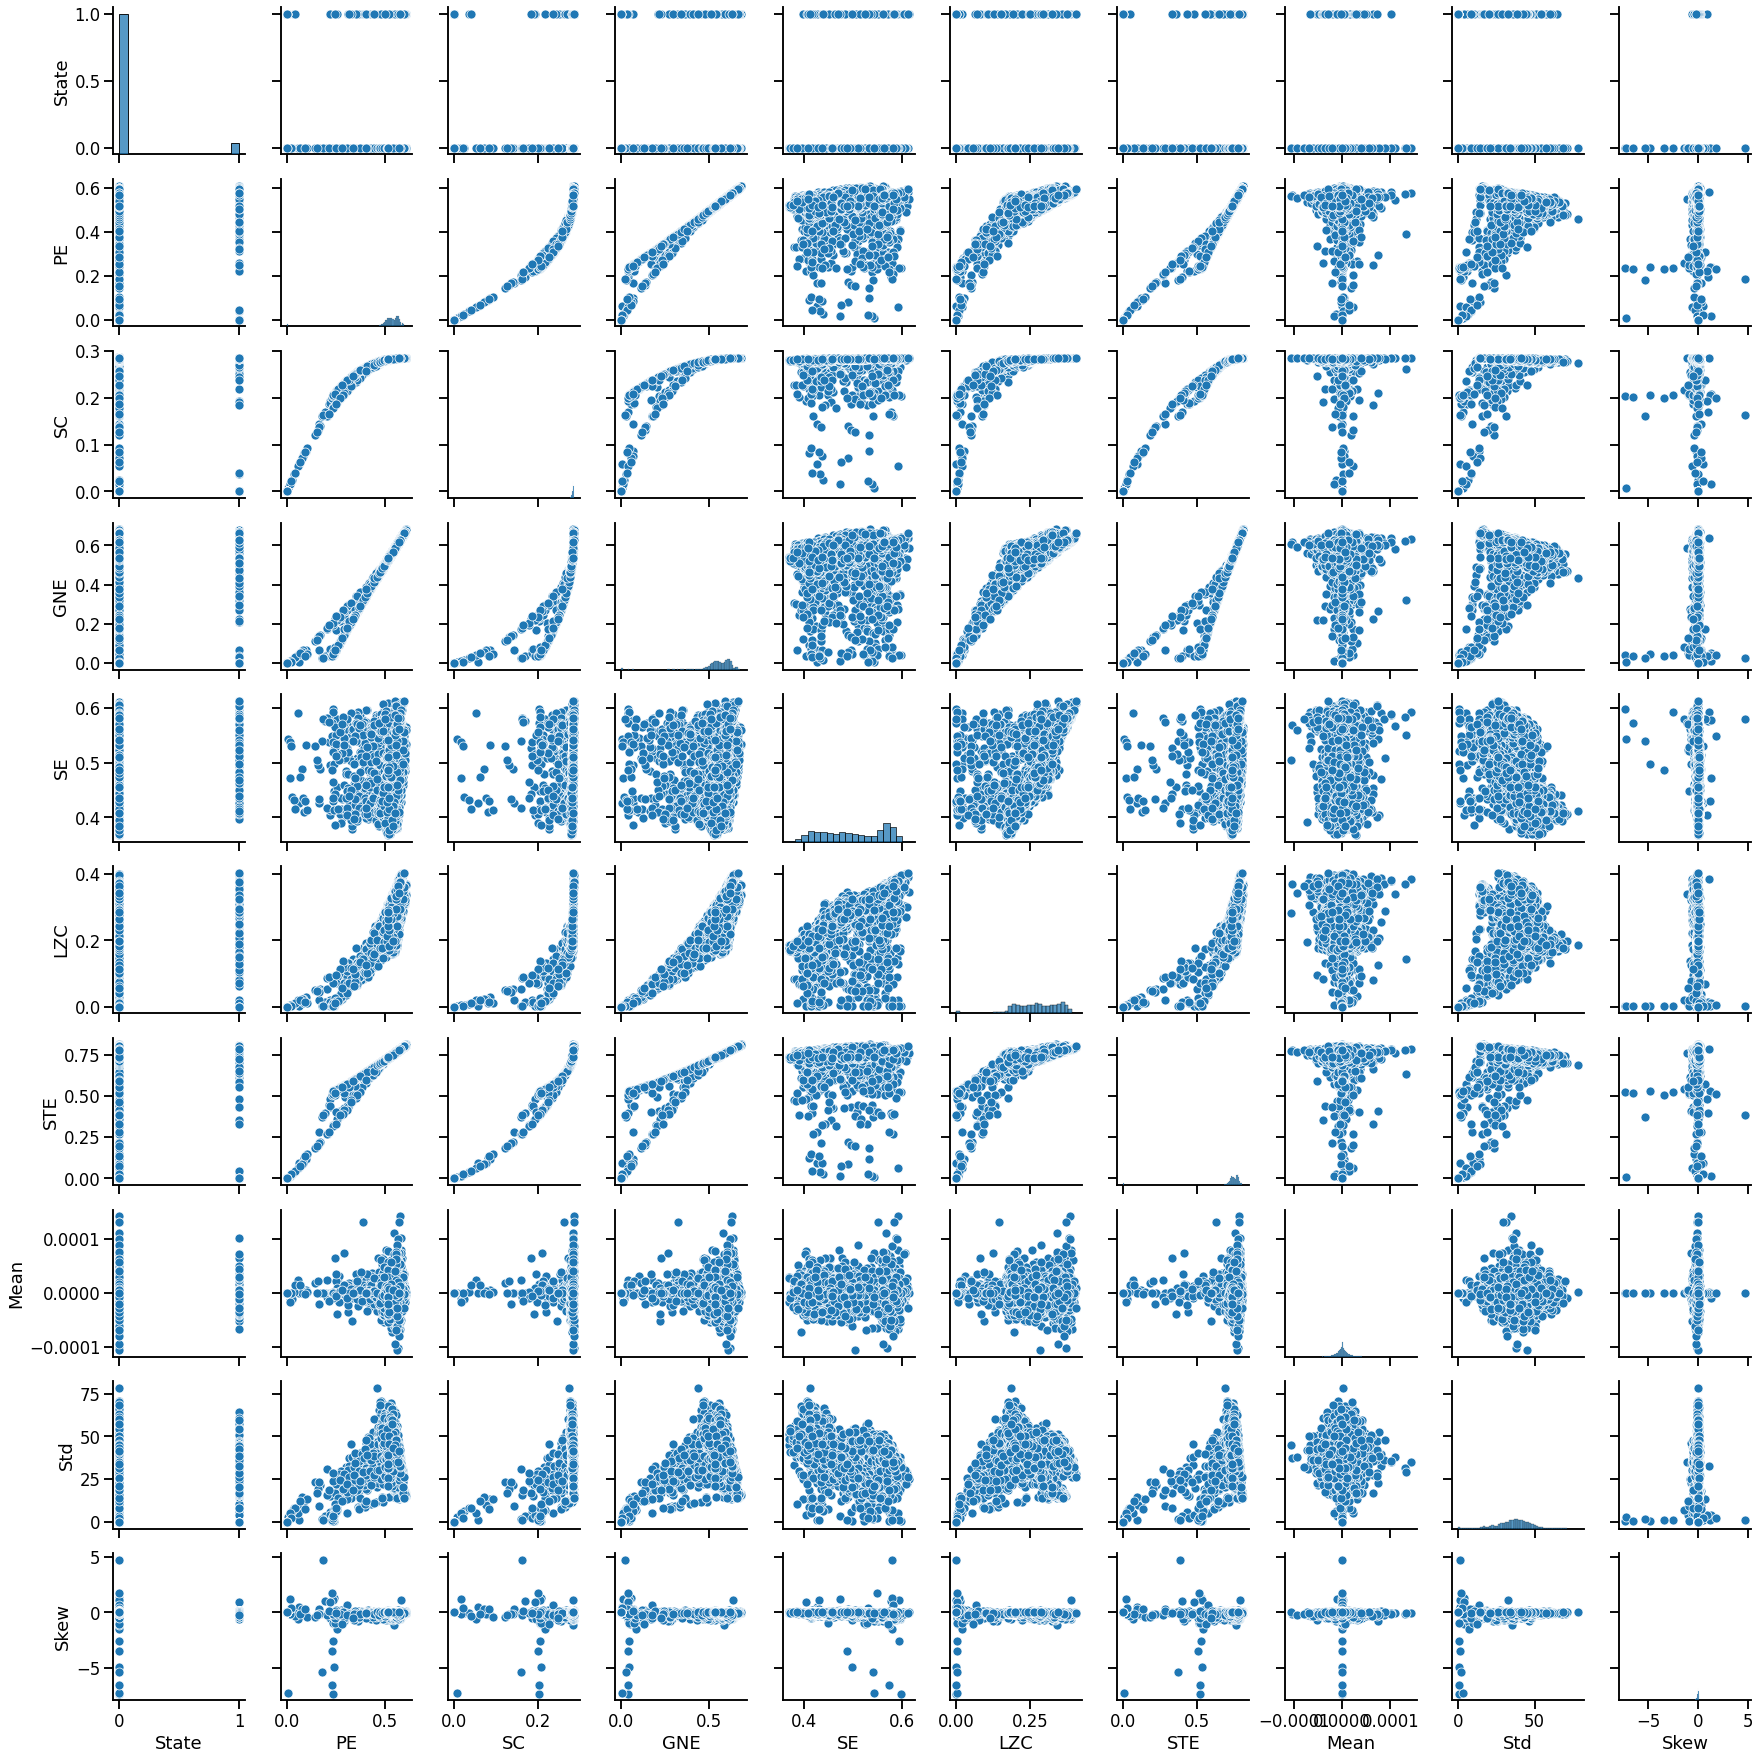

In [26]:
etiquetados_data = etiquetados.drop('Patient',axis=1)
sns.pairplot(etiquetados_data)

Sacamos las variables 'Patient' y 'State' para apreciar mejor las correlaciones entre las variables restantes. 

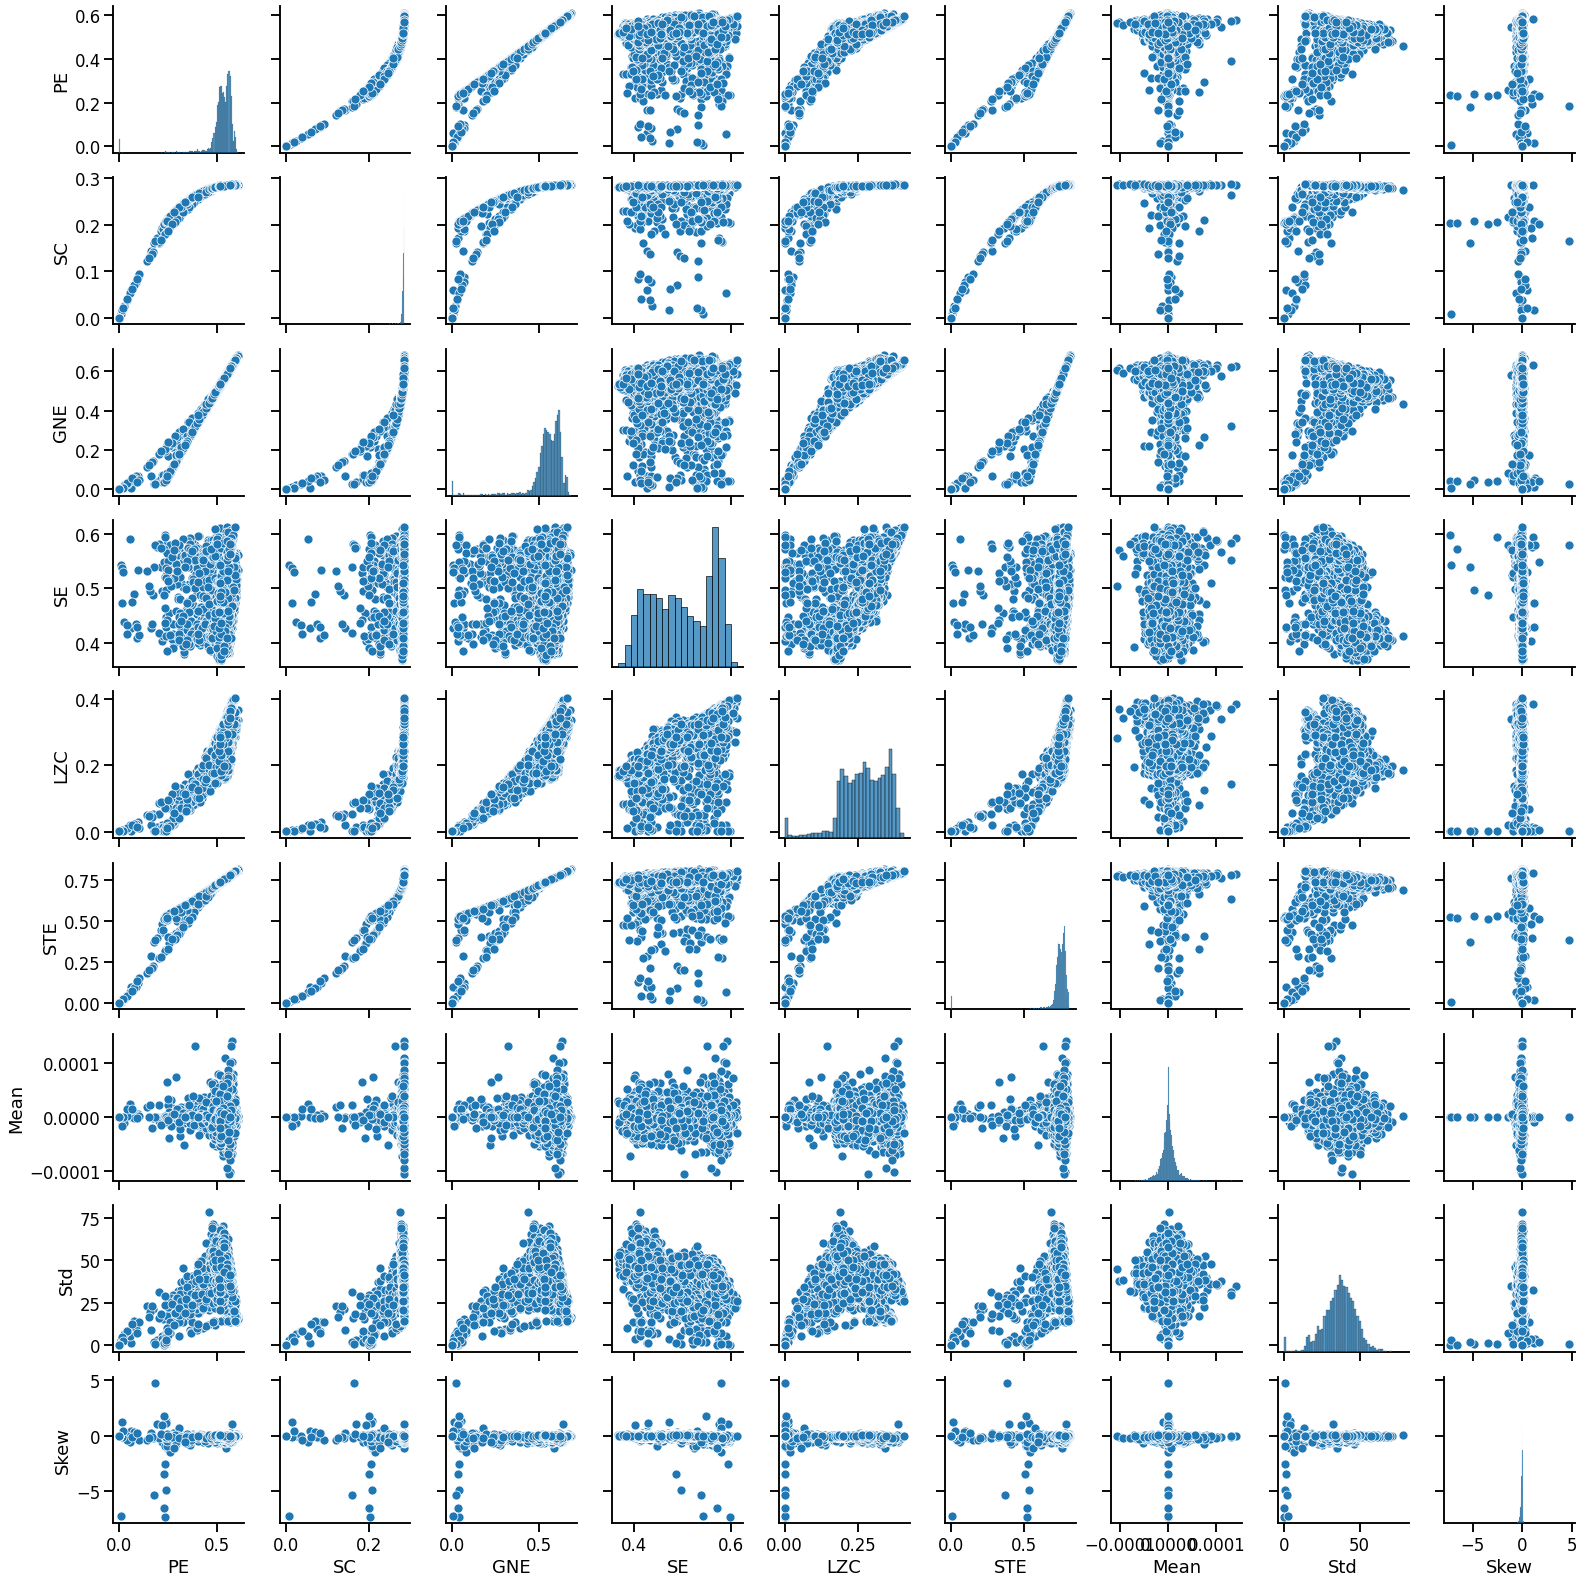

In [27]:
etiquetados_p_e = etiquetados.drop(['Patient','State'],axis=1)
sns.pairplot(etiquetados_p_e)

Visualizamos las correlaciones ahora en una matriz utilizando el comando `heatmap` de `Seaborn`

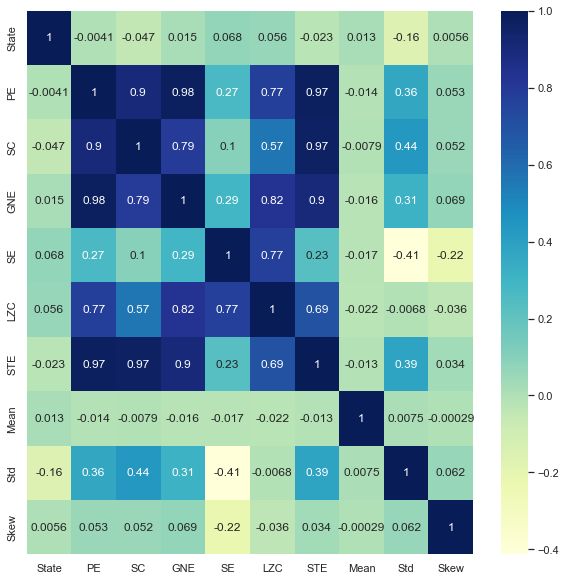

In [29]:
corr_matrix = etiquetados_data.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(18,18)})

Las correlaciones que tenemos son:
 * PE se correlaciona mas fuertemente con las variables GNE, STE, SC y LZC en ese orden 
 * SC se correlaciona mas fuertemente con las variables STE y GNE en ese orden 
 * GNE se correlaciona mas fuertemente con las variables STE y LZC en ese orden 

In [37]:
#AGREGAR CORRELACIONES POR PACIENTE

------------------------------------
### 3. Visualización

Veamos las distribuciones de las variables en los datos etiquetados

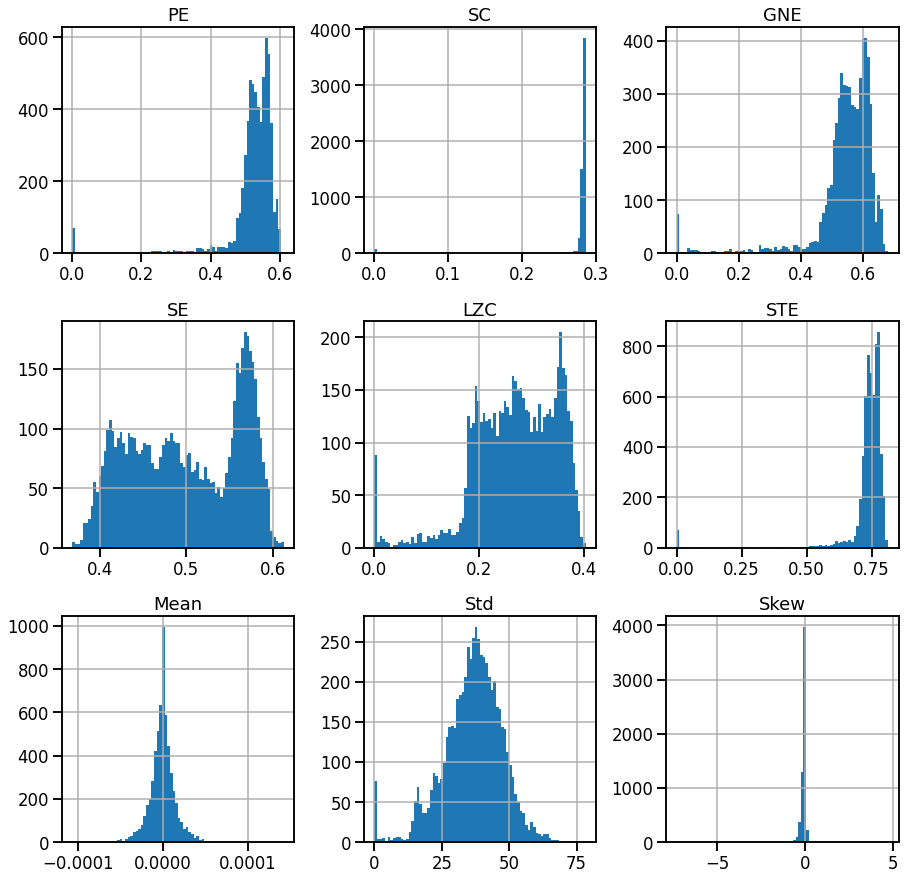

In [27]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
etiquetados[features].hist(figsize=(15, 15),bins=80);

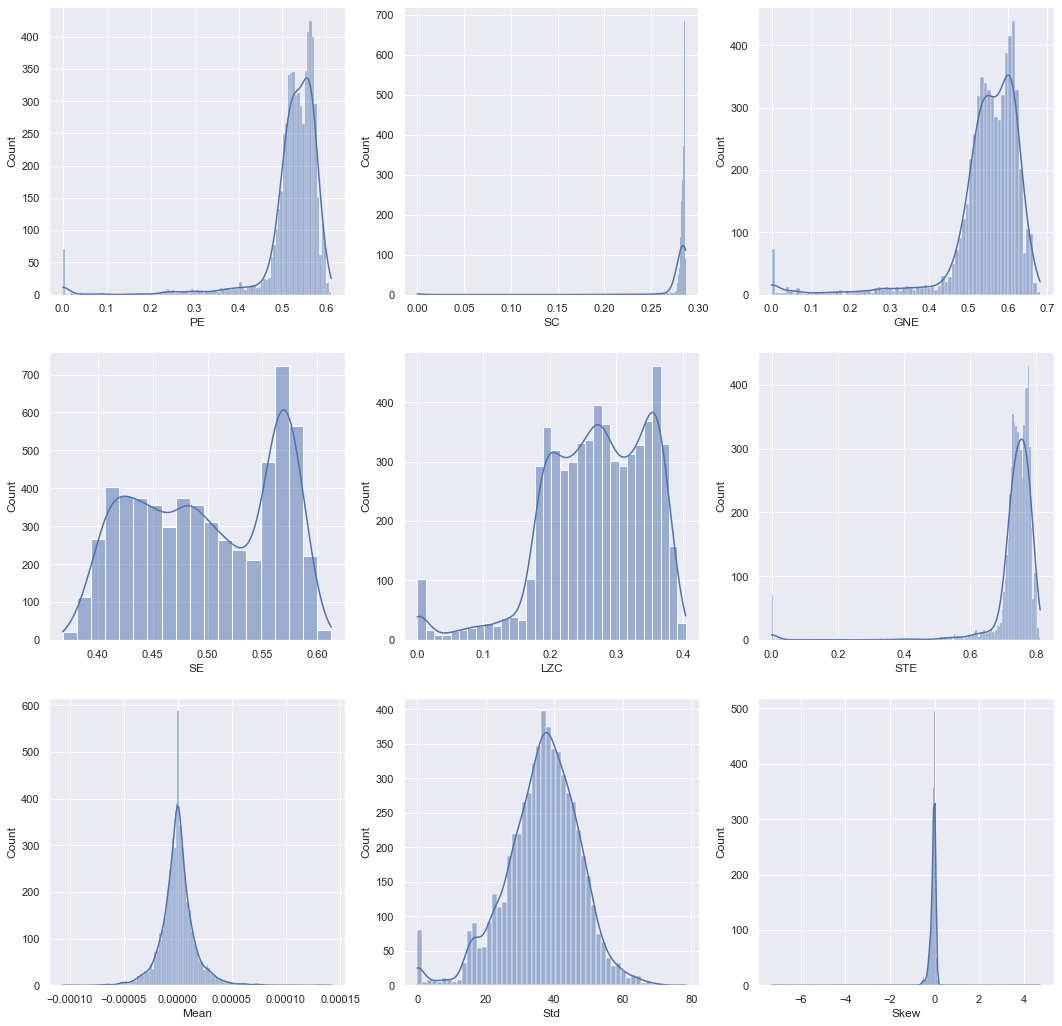

In [38]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(etiquetados,x=feature,kde=True)

Podemos presumir que las variables 'Mean', 'STD' y 'STE' presentan una distribucion normal, y que las variables 'Skew' y 'SC' se asemejan a una delta de Dirac. No podemos suponer o distinguir una distribucion definida para las otras variables. 

nota: una distribucion normal es el limite de una delta de dirac

Ahora distinguimos las distribuciones por paciente, por estado, y para ambas variables en conjunto 

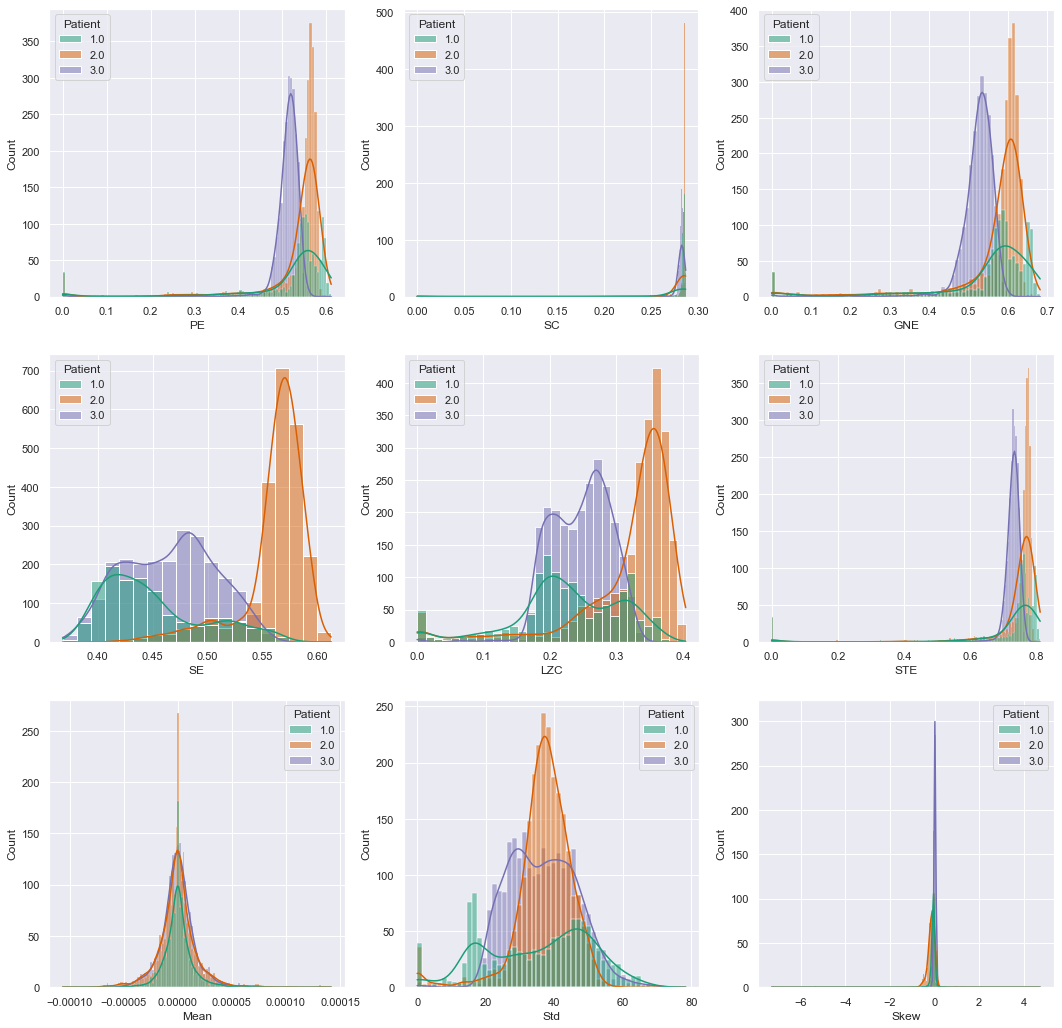

In [30]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(etiquetados,x=feature,hue='Patient',palette='Dark2',kde=True)

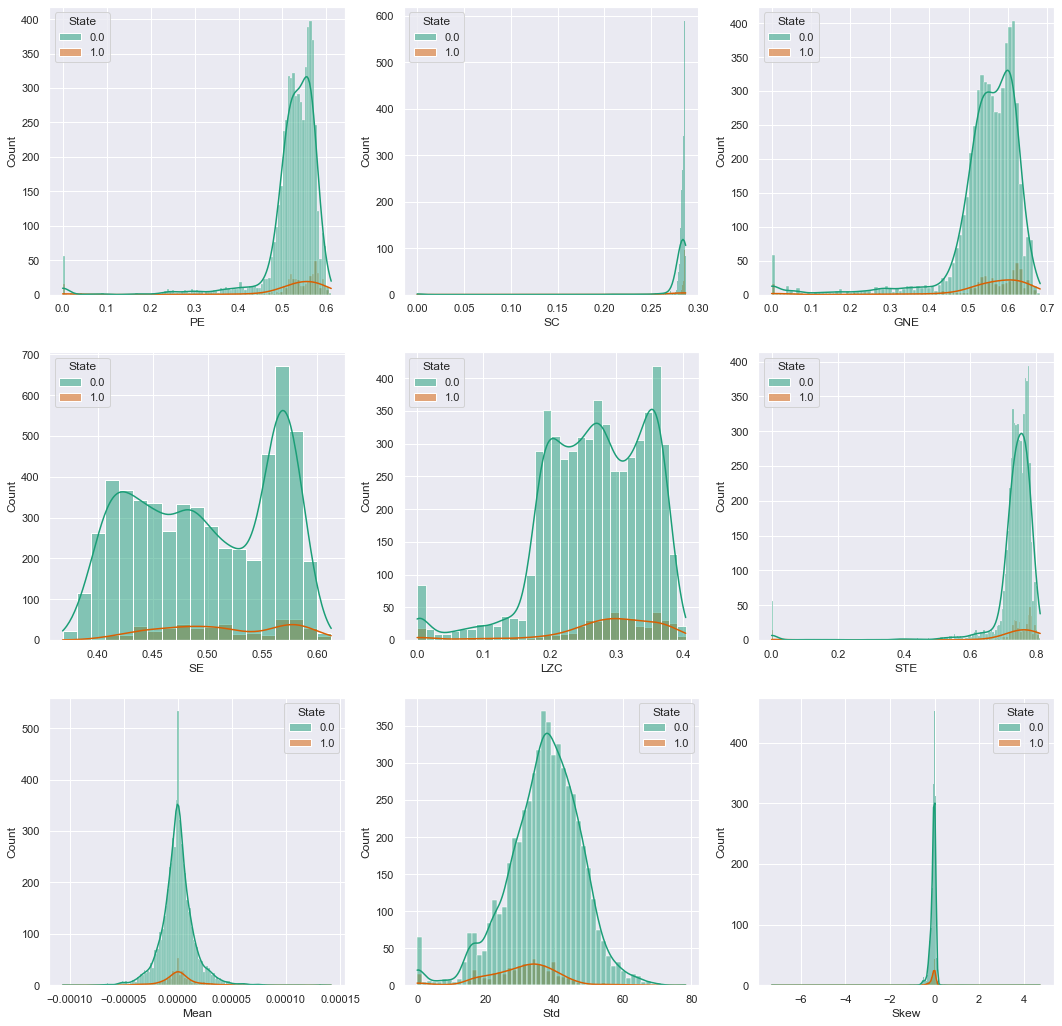

In [31]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(etiquetados,x=feature,hue='State',palette='Dark2', kde=True)
    #distinguir ademas por paciente Y por estado utilizando los dataframes separados que tenemos arriba 7
    #fijarse si se puede distinguir por frecuencia relativa 

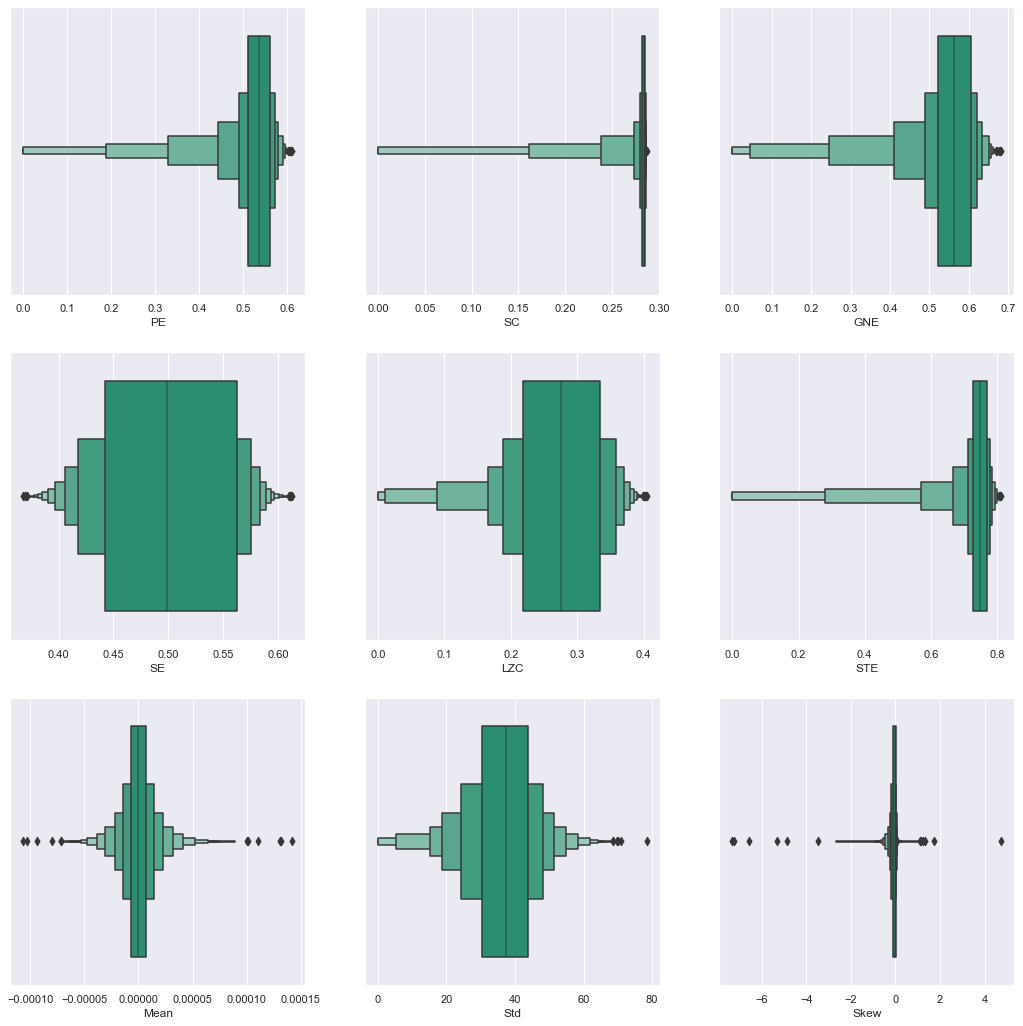

In [33]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.boxenplot(x=feature,hue='State',data=etiquetados,palette='Dark2')

<AxesSubplot:xlabel='SE'>

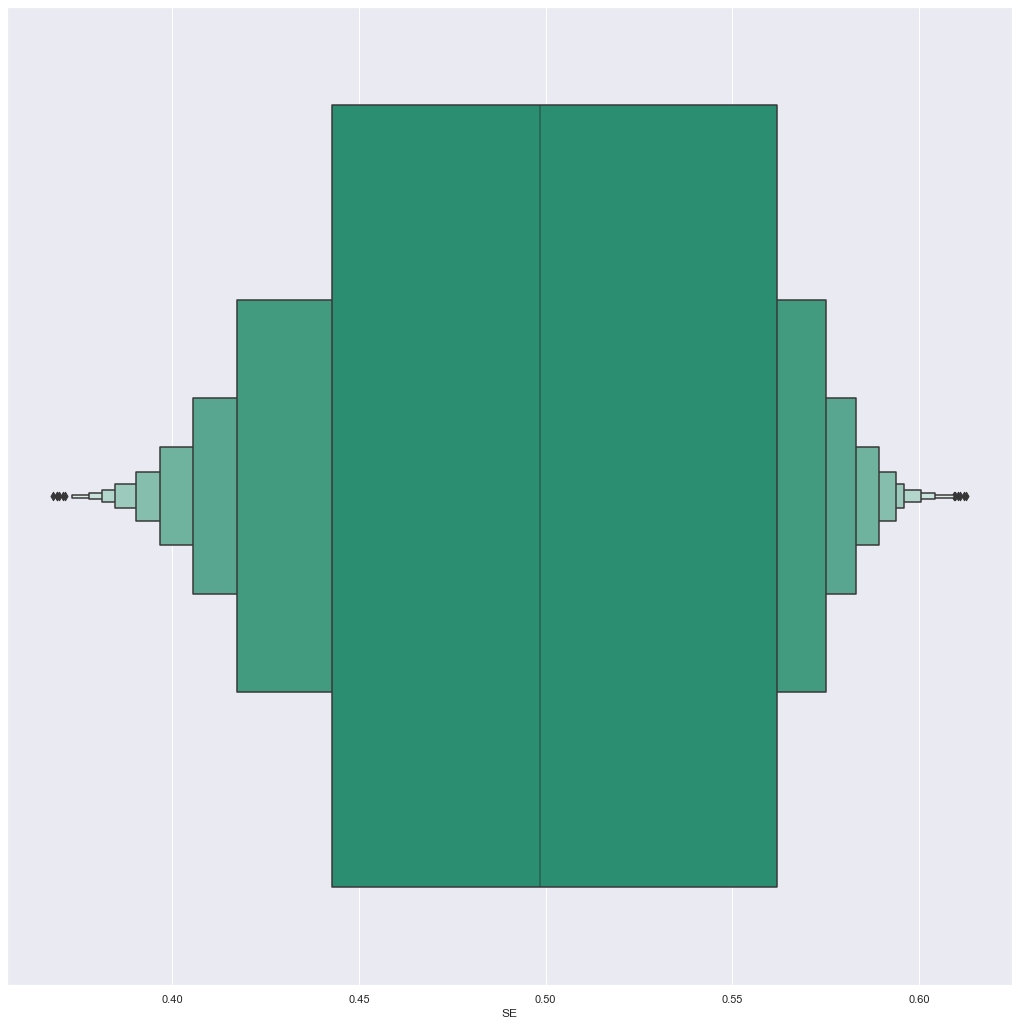

In [34]:
sns.boxenplot(x='SE',hue='State',data=etiquetados,palette='Dark2')

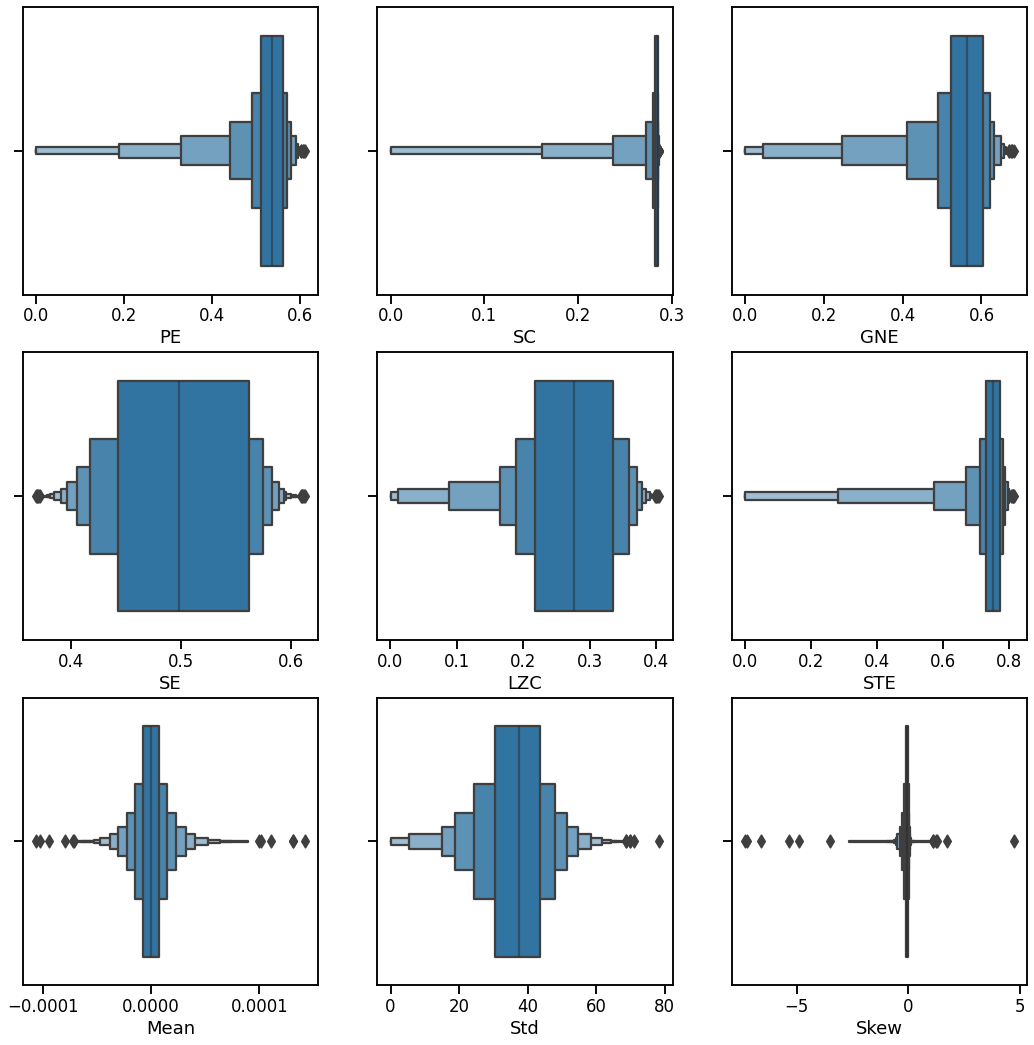

In [21]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.boxenplot(x=feature,data=etiquetados)

### Datos no etiquetados 

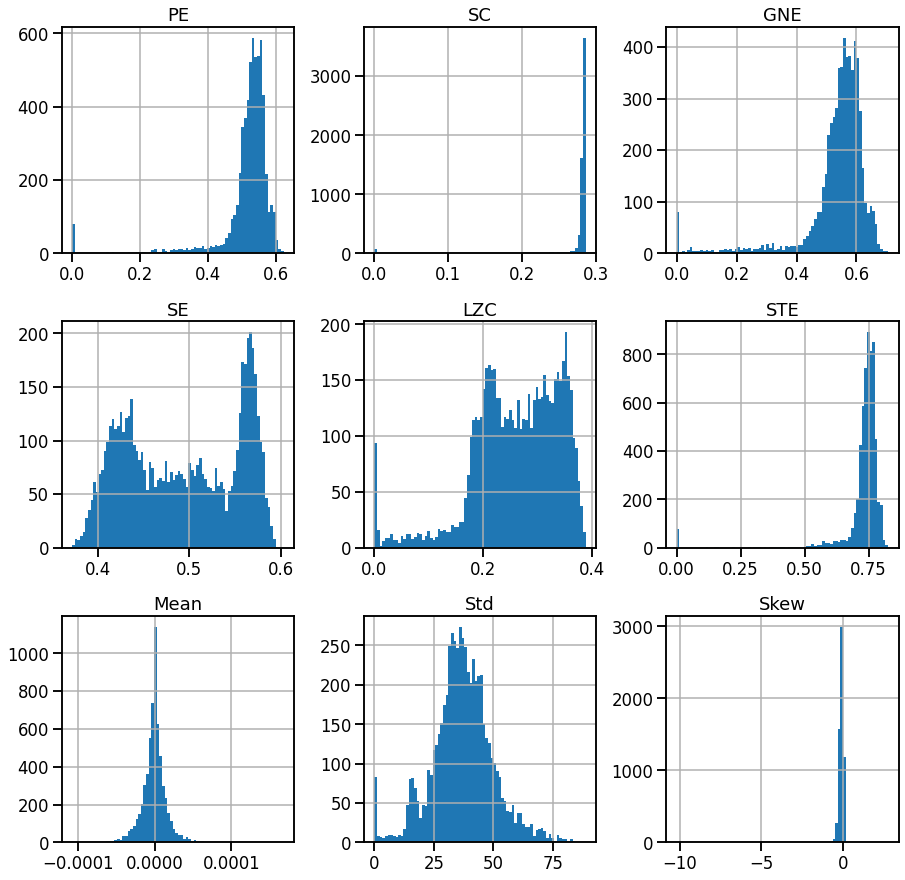

In [26]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
no_etiquetados[features].hist(figsize=(15, 15),bins=80);

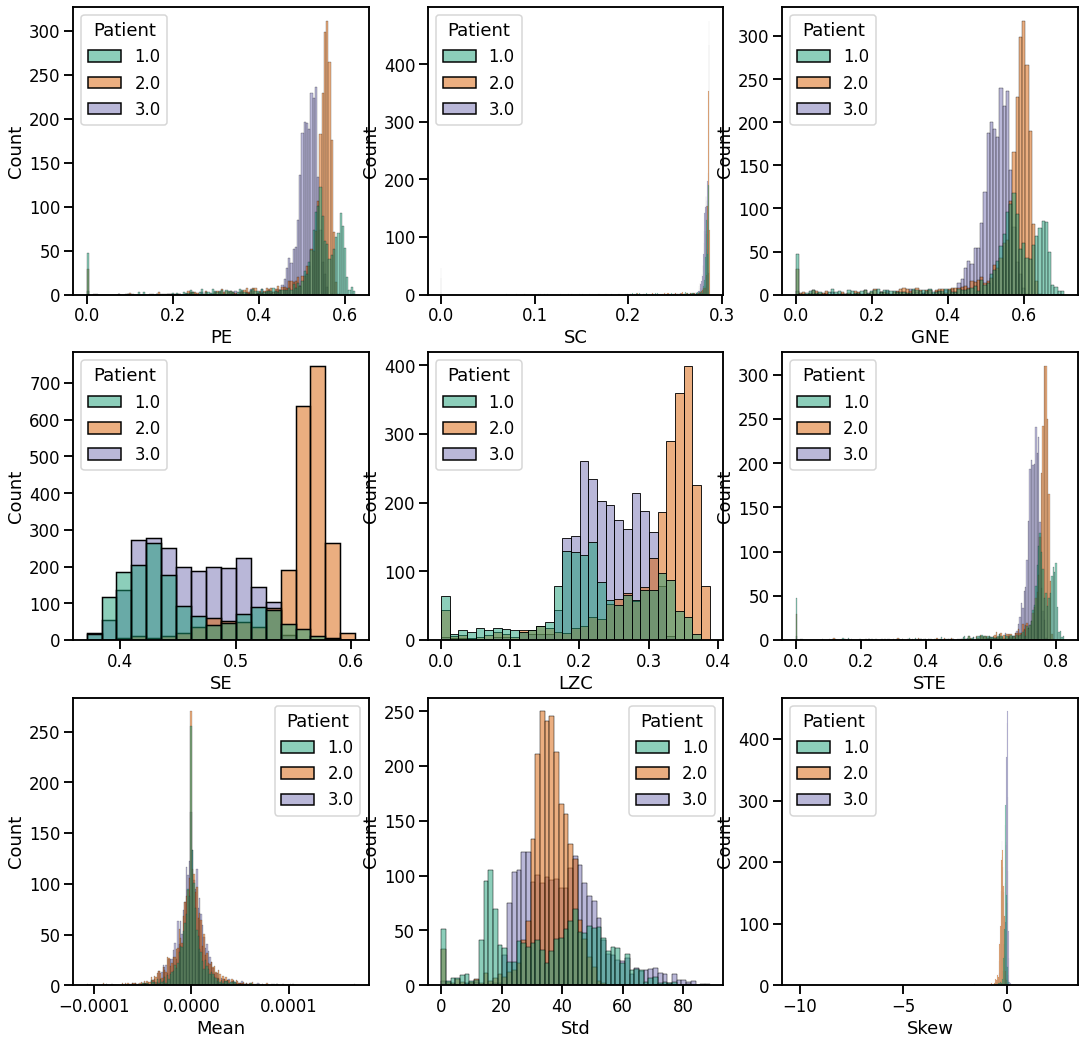

In [23]:
features = ['PE', 'SC', 'GNE','SE','LZC','STE','Mean','Std','Skew']
#plt.figure(figsize=[20,20])
plt.subplots(3,3,figsize=(18,18))
for feature in features:
    plt.subplot(3,3,features.index(feature)+1)
    sns.histplot(no_etiquetados,x=feature,hue='Patient',palette='Dark2')